# PROJECT TITLE : STUDENT DATABASE MANAGEMENT

# PURPOSE :
A Student Database Management System (SDMS) is designed to efficiently handle and manage student-related data within educational institutions. All student information, including personal details, academic records, attendance, and grades, is stored in a single, centralized database, making it easy to access and manage.The system can facilitate communication between students, faculty, and administration by providing platforms for notifications, announcements, and feedback.

####   Importing required libraries

In [1]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

#### Connecting to MySQL database

In [2]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='Kusuma@123',
host='localhost',
database='studentdatabase'
)

#### Importing tables from database

#### STUDENTS TABLE

In [48]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'students' table
cursor.execute('SELECT * FROM students')
#After fetching data from the database we are storing it into Pandas DataFrame
students_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(students_data.head())

   student_id first_name last_name date_of_birth  gender       address  \
0           1       John       Doe    2000-01-15    Male   123 Main St   
1           2       Jane     Smith    1999-05-23  Female    456 Oak St   
2           3        Jim      Beam    2001-03-12    Male   789 Pine St   
3           4      Alice   Johnson    2000-02-14  Female  234 Birch St   
4           5        Bob  Williams    1998-11-11    Male  567 Cedar St   

  phone_number                      email enrollment_date  department_id  
0     555-1234      john.doe1@example.com      2018-08-20              1  
1     555-5678    jane.smith1@example.com      2017-08-20              2  
2     555-9101      jim.beam1@example.com      2019-08-20              3  
3     555-6789  alice.johnson@example.com      2018-08-20              1  
4     555-1235   bob.williams@example.com      2016-08-20              2  


#### DEPARTMENTS TABLE

In [4]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'departments' table
cursor.execute('SELECT * FROM departments')
#After fetching data from the database we are storing it into Pandas DataFrame
departments_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(departments_data.head())

   department_id         department_name head_of_department
0              1        Computer Science      Alice Johnson
1              2  Electrical Engineering          Bob Smith
2              3  Mechanical Engineering      Charlie Brown
3              4       Civil Engineering       David Wilson
4              5    Chemical Engineering          Eve Davis


#### COURSES TABLE

In [5]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'restaurant' table
cursor.execute('SELECT * FROM courses')
#After fetching data from the database we are storing it into Pandas DataFrame
courses_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(courses_data.head())

   course_id                             course_name  \
0          1        Introduction to Computer Science   
1          2          Data Structures and Algorithms   
2          3                        Database Systems   
3          4                        Machine Learning   
4          5  Introduction to Electrical Engineering   

                                  course_description  department_id  credits  
0  An introduction to the fundamental concepts of...              1        3  
1  Advanced study of data structures and algorith...              1        4  
2  Introduction to database management systems an...              1        4  
3  Introduction to machine learning algorithms an...              1        3  
4  Basic principles and applications of electrica...              2        3  


#### ENROLLMENTS TABLE

In [6]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'enrollments' table
cursor.execute('SELECT * FROM enrollments')
#After fetching data from the database we are storing it into Pandas DataFrame
enrollments_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(enrollments_data.head())

   enrollment_id  student_id  course_id enrollment_date
0            223           1          1      2023-01-15
1            224           2          2      2023-01-16
2            225           3          3      2023-01-17
3            226           4          4      2023-01-18
4            227           5          5      2023-01-19


#### INSTRUCTORS TABLE

In [7]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'instructors' table
cursor.execute('SELECT * FROM instructors')
#After fetching data from the database we are storing it into Pandas DataFrame
instructors_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(instructors_data.head())

   instructor_id first_name last_name                        email  \
0              1       John       Doe         john.doe@example.com   
1              2       Jane     Smith       jane.smith@example.com   
2              3    Michael   Johnson  michael.johnson@example.com   
3              4      Emily     Davis      emily.davis@example.com   
4              5      David     Brown      david.brown@example.com   

  phone_number  department_id  
0     555-1234              1  
1     555-5678              2  
2     555-8765              3  
3     555-4321              4  
4     555-3456              5  


#### GRADES TABLE

In [9]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'grades' table
cursor.execute('SELECT * FROM grades')
#After fetching data from the database we are storing it into Pandas DataFrame
grades_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(grades_data.head())

   grade_id  student_id  course_id grade date_recorded
0         1           1          1     A    2024-01-01
1         2           2          2     B    2024-01-02
2         3           3          3     C    2024-01-03
3         4           4          4     D    2024-01-04
4         5           5          5     E    2024-01-05


#### ATTENDANCE PERCENTAGE TABLE

In [10]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'attendance' table
cursor.execute('select * from attendancePercentage;')
#After fetching data from the database we are storing it into Pandas DataFrame
attendance_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(attendance_data.head())

   student_id attendancePercent
0           1             87.50
1           2             78.40
2           3             91.20
3           4             85.30
4           5             88.90


#### GRADE PERCENTAGE TABLE

In [11]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'attendancePercentage' table
cursor.execute('SELECT * FROM gradePercentage')
#After fetching data from the database we are storing it into Pandas DataFrame
gradePercentage_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(gradePercentage_data.head())

   student_id gradepercent
0           1        88.00
1           2        75.30
2           3        92.20
3           4        85.50
4           5        90.00


### CLEANING OR PROCESSING DATA

#### CHECKING FOR NULL VALUES

In [50]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("students\n----------")
print(students_data.isnull().sum())
print("\ndepartments\n----------")
print(departments_data.isnull().sum())
print("\ncourses\n----------")
print(courses_data.isnull().sum())
print("\enrollments\n----------")
print(enrollments_data.isnull().sum())
print("\ninstructorss\n----------")
print(instructors_data.isnull().sum())
print("\nclasses\n----------")
print(classes_data.isnull().sum())
print("\ngrades\n----------")
print(grades_data.isnull().sum())
print("\ngradePercentage\n----------")
print(gradePercentage_data.isnull().sum())
print("\nattendancePercentage\n----------")
print(attendance_data.isnull().sum())

students
----------
student_id         0
first_name         0
last_name          0
date_of_birth      0
gender             0
address            0
phone_number       0
email              0
enrollment_date    0
department_id      0
dtype: int64

departments
----------
department_id         0
department_name       0
head_of_department    0
dtype: int64

courses
----------
course_id             0
course_name           0
course_description    0
department_id         0
credits               0
dtype: int64
\enrollments
----------
enrollment_id      0
student_id         0
course_id          0
enrollment_date    0
dtype: int64

instructorss
----------
instructor_id    0
first_name       0
last_name        0
email            0
phone_number     0
department_id    0
dtype: int64

classes
----------
class_id         0
course_id        0
instructor_id    0
semester         0
year             0
schedule         0
dtype: int64

grades
----------
grade_id         0
student_id       0
course_id        0

#### CHECKING FOR DUPLICATE VALUES

In [53]:
# Print the number of duplicate rows in the DataFrame
print("students\n----------")
print(students_data.duplicated().sum())
print("\ndepartments\n----------")
print(departments_data.duplicated().sum())
print("\ncourses\n----------")
print(courses_data.duplicated().sum())
print("\nenrollments\n----------")
print(enrollments_data.duplicated().sum())
print("\ninstructorss\n----------")
print(instructors_data.duplicated().sum())
print("\nclasses\n----------")
print(classes_data.duplicated().sum())
print("\ngrades\n----------")
print(grades_data.duplicated().sum())
print("\ngradePercentage\n----------")
print(gradePercentage_data.duplicated().sum())
print("\nattendancePercentage\n----------")
print(attendance_data.duplicated().sum())

students
----------
0

departments
----------
0

courses
----------
0

enrollments
----------
0

instructorss
----------
0

classes
----------
0

grades
----------
0

gradePercentage
----------
0

attendancePercentage
----------
0


### Visualizing the data

####  Using group by for getting department wise student count 

In [14]:
cursor.execute('SELECT department_id, COUNT(*) AS student_count FROM students GROUP BY department_id;')
# Fetch the data and store it into a Pandas DataFrame
studentCount_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
studentCount_data = pd.DataFrame(studentCount_data)
print(studentCount_data)

   department_id  student_count
0              1             29
1              2             29
2              3             28
3              4              8
4              5              8


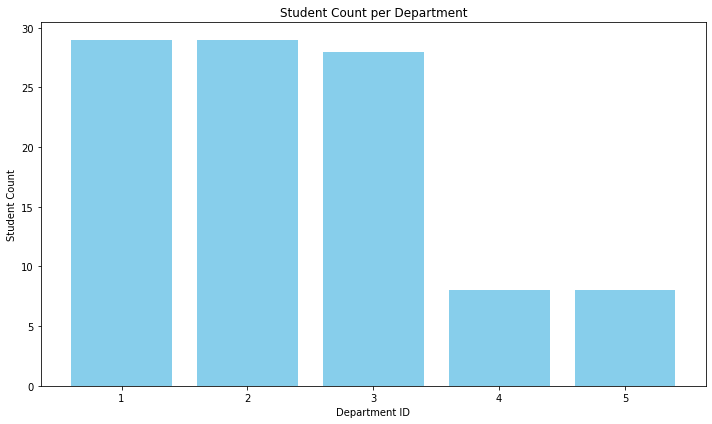

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(studentCount_data['department_id'], studentCount_data['student_count'], color='skyblue')
plt.xlabel('Department ID')
plt.ylabel('Student Count')
plt.title('Student Count per Department')
plt.xticks(studentCount_data['department_id'], rotation=0)
plt.tight_layout()
plt.show()

From above graph we can say that DepartmentId with 1(Computer Science) is having more number of students and less number of students in department 5(Chemical Engineering).

#### Department wise courses count

In [15]:
cursor.execute('SELECT department_id, COUNT(*) AS course_count FROM courses GROUP BY department_id;')
# Fetch the data and store it into a Pandas DataFrame
courseCount_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
courseCount_data = pd.DataFrame(courseCount_data)
print(courseCount_data)

   department_id  course_count
0              1             4
1              2             4
2              3             4
3              4             4
4              5             4
5              6             4


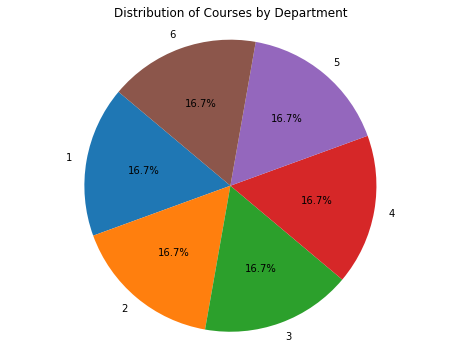

In [44]:
# Assuming courseCount_data is already fetched and stored in DataFrame
labels = courseCount_data['department_id']
sizes = courseCount_data['course_count']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Courses by Department')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

From the above pie chart it is very clear that each department is having same number of courses i.e., 4

#### average credits for each course

In [16]:
cursor.execute('select course_id,course_name,avg(credits) from courses group by course_id; ')
# Fetch the data and store it into a Pandas DataFrame
avgCredits_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
avgCredits_data = pd.DataFrame(avgCredits_data)
print(avgCredits_data)

    course_id                             course_name avg(credits)
0           1        Introduction to Computer Science       3.0000
1           2          Data Structures and Algorithms       4.0000
2           3                        Database Systems       4.0000
3           4                        Machine Learning       3.0000
4           5  Introduction to Electrical Engineering       3.0000
5           6                        Circuit Analysis       4.0000
6           7               Digital Signal Processing       4.0000
7           8                           Power Systems       3.0000
8           9  Introduction to Mechanical Engineering       3.0000
9          10                         Fluid Mechanics       4.0000
10         11                       Mechanical Design       4.0000
11         12                          Thermodynamics       3.0000
12         13       Introduction to Civil Engineering       3.0000
13         14                     Structural Analysis       4.

#### Number of students enrolled in each course

In [17]:
cursor.execute('SELECT course_id, COUNT(*) AS enrollment_count FROM enrollments GROUP BY course_id; ')
# Fetch the data and store it into a Pandas DataFrame
coursesEnrolledCount_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
coursesEnrolledCount_data = pd.DataFrame(coursesEnrolledCount_data)
print(coursesEnrolledCount_data)

    course_id  enrollment_count
0           1                 5
1           2                 5
2           3                 5
3           4                 5
4           5                 5
5           6                 5
6           7                 4
7           8                 4
8           9                 4
9          10                 4
10         11                 4
11         12                 4
12         13                 4
13         14                 4
14         15                 4
15         16                 4
16         17                 4
17         18                 4
18         19                 4
19         20                 4
20         21                 4
21         22                 4
22         23                 4
23         24                 4


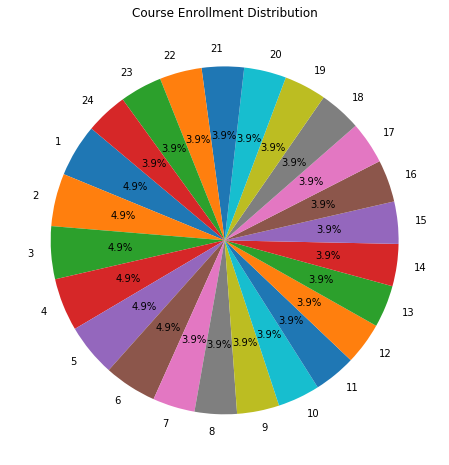

In [45]:
# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(coursesEnrolledCount_data['enrollment_count'], labels=coursesEnrolledCount_data['course_id'], autopct='%1.1f%%', startangle=140)
plt.title('Course Enrollment Distribution')
plt.show()

From above we can say that in courses with id's 1,2,3,4,5,6 are being enrolled more.

In [18]:
cursor.execute('SELECT department_id, COUNT(*) AS instructor_count FROM instructors GROUP BY department_id;')
# Fetch the data and store it into a Pandas DataFrame
instPerDept_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
instPerDept_data = pd.DataFrame(instPerDept_data)
print(instPerDept_data)

   department_id  instructor_count
0              1                 3
1              2                 3
2              3                 3
3              4                 2
4              5                 2
5              6                 2


#### Number of classes thought by each instructor

In [19]:
cursor.execute('SELECT i.instructor_id, i.first_name, i.last_name, COUNT(c.class_id) AS classes_taught FROM instructors i LEFT JOIN classes c ON i.instructor_id = c.instructor_id GROUP BY i.instructor_id, i.first_name, i.last_name ORDER BY i.instructor_id;')
# Fetch the data and store it into a Pandas DataFrame
countOfClaByInst_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
countOfClaByInst_data = pd.DataFrame(countOfClaByInst_data)
print(countOfClaByInst_data)

    instructor_id first_name last_name  classes_taught
0               1       John       Doe               5
1               2       Jane     Smith               5
2               3    Michael   Johnson               5
3               4      Emily     Davis               5
4               5      David     Brown               5
5               6       Emma    Wilson               4
6               7      Chris    Taylor               4
7               8     Sophia  Anderson               4
8               9      James    Thomas               4
9              10     Olivia     Moore               4
10             11     Robert   Jackson               4
11             12        Ava    Martin               4
12             13    William       Lee               4
13             14   Isabella     Perez               4
14             15   Benjamin    Harris               4


#### Number of students enrolled in each department

In [20]:
cursor.execute('SELECT d.department_name, COUNT(*) AS enrollment_count FROM enrollments e JOIN courses c ON e.course_id = c.course_id JOIN departments d ON c.department_id = d.department_id GROUP BY d.department_name ORDER BY enrollment_count DESC;')
# Fetch the data and store it into a Pandas DataFrame
enrolCountPerDep_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
enrolCountPerDep_data = pd.DataFrame(enrolCountPerDep_data)
print(enrolCountPerDep_data)

          department_name  enrollment_count
0        Computer Science                20
1  Electrical Engineering                18
2  Mechanical Engineering                16
3       Civil Engineering                16
4    Chemical Engineering                16
5   Environmental Science                16


#### Department wise average credits

In [55]:
cursor.execute('SELECT d.department_name, AVG(c.credits) AS average_credits FROM courses c JOIN departments d ON c.department_id = d.department_id GROUP BY d.department_name ORDER BY d.department_name; ')
# Fetch the data and store it into a Pandas DataFrame
avgCreditsDept_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
avgCreditsDept_data = pd.DataFrame(avgCreditsDept_data)
print(avgCreditsDept_data)

          department_name average_credits
0    Chemical Engineering          3.5000
1       Civil Engineering          3.5000
2        Computer Science          3.5000
3  Electrical Engineering          3.5000
4   Environmental Science          3.5000
5  Mechanical Engineering          3.5000


#### Department wise average of scored grades

In [21]:
cursor.execute("SELECT d.department_name, AVG(CASE WHEN g.grade = 'A' THEN 4 WHEN g.grade = 'B' THEN 3 WHEN g.grade = 'C' THEN 2 WHEN g.grade = 'D' THEN 1 WHEN g.grade = 'E' THEN 0 ELSE NULL END) AS average_grade FROM grades g JOIN courses c ON g.course_id = c.course_id JOIN departments d ON c.department_id = d.department_id GROUP BY d.department_name ORDER BY average_grade DESC;")
# Fetch the data and store it into a Pandas DataFrame
depAvgGra_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Print the DataFrame
print(depAvgGra_data)


          department_name average_grade
0   Environmental Science        2.1250
1    Chemical Engineering        2.0625
2  Electrical Engineering        2.0556
3        Computer Science        2.0000
4       Civil Engineering        2.0000
5  Mechanical Engineering        1.9375


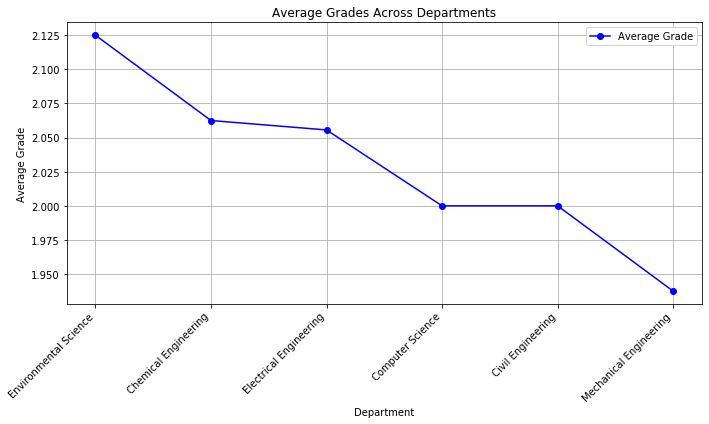

In [42]:
# Convert the department names and average grades to lists for plotting
departments = depAvgGra_data['department_name'].tolist()
average_grades = depAvgGra_data['average_grade'].tolist()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(departments, average_grades, marker='o', linestyle='-', color='b', label='Average Grade')

# Add titles and labels
plt.title('Average Grades Across Departments')
plt.xlabel('Department')
plt.ylabel('Average Grade')
plt.xticks(rotation=45, ha='right')  # Rotate department names for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

Above graph is clearly showing that the students from Environmental Science are securing higher grades and the students from mechanical engineering are scoring less grade.

#### Month and year wise enrollment count

In [22]:
cursor.execute("SELECT YEAR(enrollment_date) AS enrollment_year, MONTH(enrollment_date) AS enrollment_month, COUNT(*) AS enrollment_count FROM enrollments GROUP BY enrollment_year, enrollment_month ORDER BY enrollment_year, enrollment_month;")
# Fetch the data and store it into a Pandas DataFrame
monEnro_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Print the DataFrame
print(monEnro_data)


   enrollment_year  enrollment_month  enrollment_count
0             2023                 1                17
1             2023                 2                28
2             2023                 3                31
3             2023                 4                26


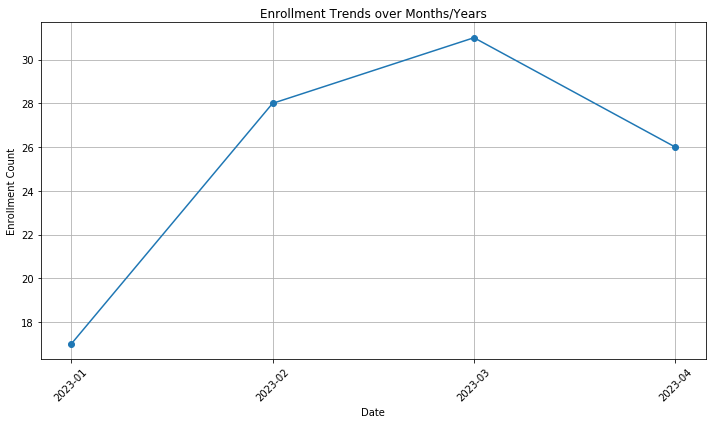

In [43]:
# Convert fetched data to a pandas DataFrame
columns = ['enrollment_year', 'enrollment_month', 'enrollment_count']
enrollment_df = pd.DataFrame(monEnro_data, columns=columns)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(enrollment_df['enrollment_year'].astype(str) + '-' + enrollment_df['enrollment_month'].astype(str).str.zfill(2), enrollment_df['enrollment_count'], marker='o', linestyle='-')
plt.title('Enrollment Trends over Months/Years')
plt.xlabel('Date')
plt.ylabel('Enrollment Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

From this observation we can say that in the month of march we are having more enrollment count. 

#### Student count per department

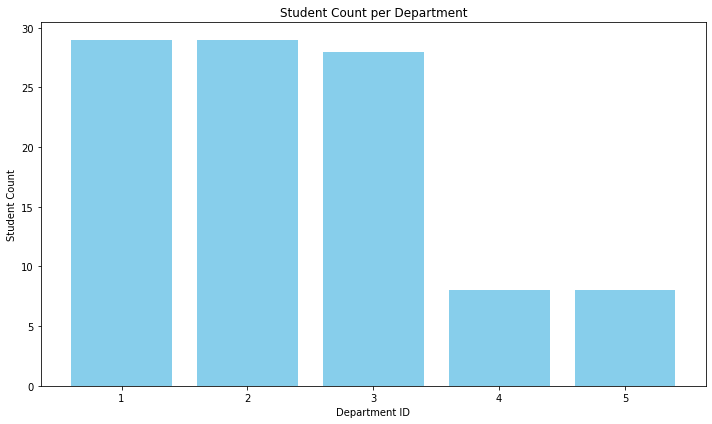

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(studentCount_data['department_id'], studentCount_data['student_count'], color='skyblue')
plt.xlabel('Department ID')
plt.ylabel('Student Count')
plt.title('Student Count per Department')
plt.xticks(studentCount_data['department_id'], rotation=0)
plt.tight_layout()
plt.show()

More number of students are in department 1 and less number of students in department 5

#### Comparing attendance and grade percentage

In [56]:
cursor.execute("SELECT gp.student_id, gp.gradePercent, ap.attendancePercent FROM gradePercentage gp JOIN attendancePercentage ap ON gp.student_id = ap.student_id;")
# Fetch the data and store it into a Pandas DataFrame
attenVsGra_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Print the DataFrame
print(attenVsGra_data.head(10))


   student_id gradePercent attendancePercent
0           1        88.00             87.50
1           2        75.30             78.40
2           3        92.20             91.20
3           4        85.50             85.30
4           5        90.00             88.90
5           6        95.30             92.00
6           7        72.50             76.50
7           8        86.90             84.10
8           9        95.00             90.00
9          10        76.80             79.80


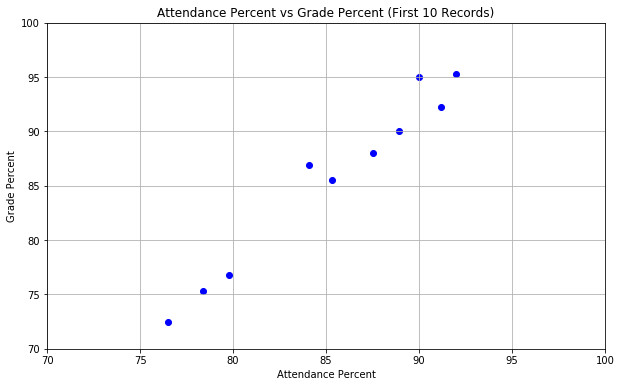

In [38]:
attenVsGra_data= attenVsGra_data.head(10)
plt.figure(figsize=(10, 6))
plt.scatter(attenVsGra_data['attendancePercent'], attenVsGra_data['gradePercent'], marker='o', linestyle='-', color='b')
plt.title('Attendance Percent vs Grade Percent (First 10 Records)')
plt.xlabel('Attendance Percent')
plt.ylabel('Grade Percent')
plt.grid(True)

# Setting x and y limits with a difference of 10
plt.xlim(70, 100)
plt.ylim(70, 100)

plt.show()








## CONCLUSION
From above graph we can say that the attendance percent and grade percent are almost proportional to each other that is the students who are good attendance are scoring good grade percent.